In this notebook, we can load and manipulate the nuclear data contained in the various HDF5 file.

In [1]:
import openmc
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
def clean_dir(object):
    """Clean listing of object attributes."""
    for item in dir(object):
        if '__' not in item:
            print(item)

In [3]:
xspath = ""
try:
    xspath = os.environ['OPENMC_CROSS_SECTIONS']
    xspath = xspath[:xspath.index('cross_sections.xml')]
except:
    print("Make sure OPENMC_CROSS_SECTIONS is defined!")

First, load the data for U-238:

In [4]:
xs_u238 = openmc.data.IncidentNeutron.from_hdf5(xspath+"U238.h5")
print(type(xs_u238))

<class 'openmc.data.neutron.IncidentNeutron'>


The various reaction types can be accessed by their ENDF MT identifier; the list of reactions for this nuclide is as follows: 

In [5]:
xs_u238.reactions

OrderedDict([(2, <Reaction: MT=2 (n,elastic)>),
             (5, <Reaction: MT=5 (n,misc)>),
             (16, <Reaction: MT=16 (n,2n)>),
             (17, <Reaction: MT=17 (n,3n)>),
             (18, <Reaction: MT=18 (n,fission)>),
             (51, <Reaction: MT=51 (n,n1)>),
             (52, <Reaction: MT=52 (n,n2)>),
             (53, <Reaction: MT=53 (n,n3)>),
             (54, <Reaction: MT=54 (n,n4)>),
             (55, <Reaction: MT=55 (n,n5)>),
             (56, <Reaction: MT=56 (n,n6)>),
             (57, <Reaction: MT=57 (n,n7)>),
             (58, <Reaction: MT=58 (n,n8)>),
             (59, <Reaction: MT=59 (n,n9)>),
             (60, <Reaction: MT=60 (n,n10)>),
             (61, <Reaction: MT=61 (n,n11)>),
             (62, <Reaction: MT=62 (n,n12)>),
             (63, <Reaction: MT=63 (n,n13)>),
             (64, <Reaction: MT=64 (n,n14)>),
             (65, <Reaction: MT=65 (n,n15)>),
             (66, <Reaction: MT=66 (n,n16)>),
             (67, <Reaction: MT=67 (n,n1

Let's inspect reaction `MT=102`, i.e., the $(n,\gamma)$ reaction:

In [6]:
xs_capture_u238 = xs_u238[102]
print(type[xs_capture_u238])
print("")
clean_dir(xs_capture_u238)

type[<Reaction: MT=102 (n,gamma)>]

_center_of_mass
_derived_products
_products
_q_value
_redundant
_xs
center_of_mass
derived_products
from_ace
from_endf
from_hdf5
mt
products
q_value
redundant
to_hdf5
xs


The attribute we want is `xs`:

In [7]:
xs_u238[102].xs

{'1200K': <openmc.data.function.Tabulated1D at 0x7f8651117970>,
 '2500K': <openmc.data.function.Tabulated1D at 0x7f86518f6c20>,
 '250K': <openmc.data.function.Tabulated1D at 0x7f86511179d0>,
 '294K': <openmc.data.function.Tabulated1D at 0x7f8651117a00>,
 '600K': <openmc.data.function.Tabulated1D at 0x7f8651117a90>,
 '900K': <openmc.data.function.Tabulated1D at 0x7f8651117af0>}

This shows that the HDF5 file includes data for U-238 evaluated at several temperatures.  Let's choose 294K:

In [8]:
clean_dir(xs_u238[102].xs['294K'])

_abc_impl
_breakpoints
_interpolate_scalar
_interpolation
_threshold_idx
_x
_y
breakpoints
from_ace
from_hdf5
integral
interpolation
n_pairs
n_regions
to_hdf5
x
y


The `x` and `y` attributes are the energies and cross-section values we want:

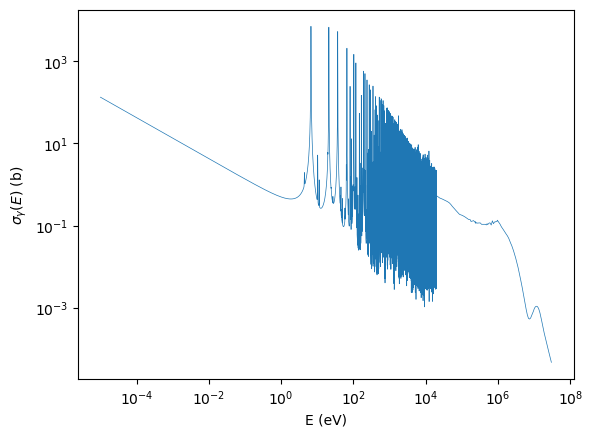

In [9]:
E294 = xs_u238[102].xs['294K'].x
Sigma294 = xs_u238[102].xs['294K'].y

plt.loglog(E294, Sigma294, lw=0.5);
plt.xlabel('E (eV)')
plt.ylabel('$\sigma_{\gamma}(E)$ (b)')
plt.show()

We can also inspect the same cross sections at different temperatures, e.g.,

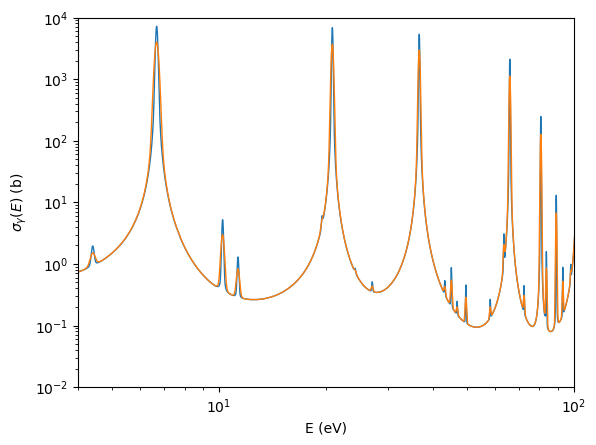

In [10]:
E1200 = xs_u238[102].xs['1200K'].x
Sigma1200 = xs_u238[102].xs['1200K'].y
plt.loglog(E294, Sigma294, lw=1);
plt.loglog(E1200, Sigma1200, lw=1);
plt.xlabel('E (eV)')
plt.ylabel('$\sigma_{\gamma}(E)$ (b)')
plt.xlim(4, 100)
plt.ylim(1e-2, 1e4)
plt.show()

With this interface to the cross-section data, one can easily construct cross-section vectors on arbitrary energy grids for computing things like the narrow-resonance flux spectrum.